# NHL 2016/2017 Data Exploration

### The goal of this Data Exploration is to analyze NHL player data from the 2016/2017 NHL season, and understand the following:
 - The distribution of age and career length across the NHL.
 - Country representation. 
 - Who the highest earning players in the NHL are.
 - Which positions tend to command the highest salary.
 - The effects of age on offensive performance.
 - Who the most 'unlucky' players in the NHL are.
 - Over/under performing players in terms of on-ice efficiency and value for money.

### Importing packages and dataset

In [63]:
import pandas as pd #Used for Data manipulation
import numpy as np #Importing incase needed
import matplotlib.pyplot as plt #Used for formatting plots
import seaborn as sns #Used for plotting

%matplotlib inline

In [64]:
players = pd.read_csv('nhl_salary_data.csv', encoding = 'ISO-8859-1')
pd.set_option('max_columns', None) #Displays all available columns
players.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,First Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI/GP.1,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,Diff/60,iCF,iCF.1,iFF,iSF,iSF.1,iSF.2,ixG,iSCF,iRB,iRS,iDS,sDist,sDist.1,Pass,iHF,iHF.1,iHA,iHDf,iMiss,iGVA,iTKA,iBLK,iGVA.1,iTKA.1,iBLK.1,BLK%,iFOW,iFOL,iFOW.1,iFOL.1,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,L,Chabot,Thomas,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,7.16,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,-16.74,2.0,2,2.0,1.0,1,1,0.0,0.0,0.0,0.0,0.0,43.0,49.3,0.0,1,1.0,0.0,1.0,1,1,0,0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0,0,0,0,0,9.0,12.0,8.0,10.0,5.0,8.0,0.5,0.9,2.0,3.0,0.0,2.0,1.0,1.0,0.0,1.0,1,2,4.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,R,Ceci,Cody,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,23.17,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,-0.95,287.0,287,197.0,143.0,143,143,6.1,7.0,7.0,9.0,16.0,52.4,46.3,138.1,111,111.0,154.0,-43.0,54,74,22,159,74.0,22.0,159.0,8.0,1,0,1.0,0.0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10.0,5.0,-4,2.2,10,0,0,0,0,1433.0,1992.0,1038.0,1423.0,757.0,997.0,62.0,88.8,197.0,280.0,56.0,85.0,68.0,82.0,79.0,94.0,147,176,949.0,939.0,749.0,671.0,284.0,197.0,104.0,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,R,Okposo,Kyle,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,18.95,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,1.51,283.0,283,212.0,155.0,156,156,17.4,64.0,16.0,20.0,36.0,28.4,26.3,196.8,53,53.0,68.0,-15.0,57,36,26,25,36.0,26.0,25.0,2.4,54,45,54.0,45.0,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11.0,8.0,-2,-0.5,12,0,0,0,0,1301.0,1051.0,986.0,826.0,734.0,606.0,70.8,46.4,235.0,133.0,71.0,40.0,60.0,34.0,76.0,52.0,136,86,739.0,600.0,340.0,351.0,168.0,129.0,56.0,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,Erik,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,20.31,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,-1.88,88.0,88,55.0,40.0,40,40,1.4,2.0,1.0,4.0,5.0,55.1,51.0,153.0,66,66.0,66.0,0.0,15,23,4,44,23.0,4.0,44.0,7.3,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6.0,6.0,1,2.7,4,2,0,0,0,460.0,605.0,339.0,467.0,259.0,340.0,22.0,33.6,80.0,130.0,16.0,35.0,27.0,20.0,29.0,32.0,56,52,324.0,328.0,198.0,197.0,86.0,59.0,26.0,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,R,Wilson,Tom,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,-0.57,166.0,166,118.0,95.0,95,95,9.3,35.0,8.0,10.0,18.0,30.9,26.4,96.3,239,239.0,134.0,105.0,23,21,36,44,21.0,36.0,44.0,4.4,3,7,3.0,7.0,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40.0,29.0,-11,-14.3,33,9,0,1,1,766.0,992.0,546.0,720.0,398.0,495.0,33.5,47.5,124.0,159.0,31.0,41.0,30.0,37.0,43.0,53.0,73,90,528.0,490.0,512.0,422.0,157.0,126.0,88.0,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [65]:
players.shape

(612, 154)

### Visualizing the distribution of players and their respective draft year in the NHL

(1987, 2020)

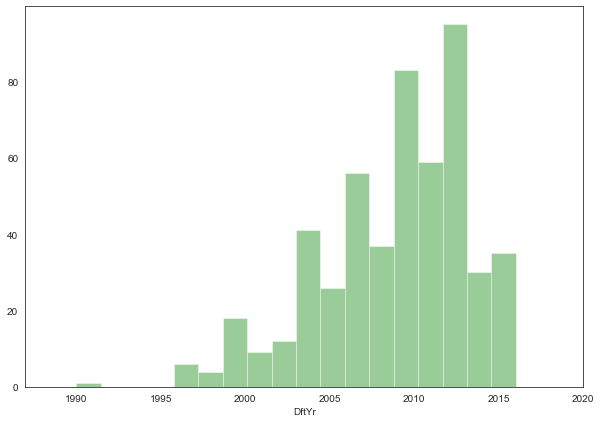

In [215]:
plt.figure(figsize = (10,7))
sns.set_style('white')

sns.distplot(players['DftYr'], kde = False, color = 'green') #visualzing distribution of draft years
plt.xlim(1987,2020)

Creating functions to determine years in the league & age.

In [209]:
def years_in_league(df):
    """
    Takes dataframe as input
    Defines current year as 2017
    Returns current year minus draft year to calculate years in league
    """
    year = 2017
    for x in players:
        return year - df['DftYr']

players['completed_seasons'] = players.apply(years_in_league, axis = 1)

def age(df):
    """
    Takes dataframe as input
    Defines current year as 2017, filters to find birth year for each player
    Returns current year minus birth year to calculate age
    """
    year = 2017
    dob = df['Born'][:2]
    birth = str(19) + str(dob)
    for x in players:
        return year - int(birth)
    
players['age'] = players.apply(age, axis = 1)

Adding in a current season column.

In [208]:
players['current_season'] = 2017

players[['Last Name', 'First Name', 'Team', 'completed_seasons', 'age']]

,Last Name,First Name,Team,completed_seasons,age
0,Chabot,Thomas,OTT,2.0,20
1,Ceci,Cody,OTT,5.0,24
2,Okposo,Kyle,BUF,11.0,29
3,Gudbranson,Erik,VAN,7.0,25
4,Wilson,Tom,WSH,5.0,23
...,...,...,...,...,...
607,Shore,Nick,L.A,6.0,25
608,Suter,Ryan,MIN,14.0,32
609,Vlasic,Marc-Edouard,S.J,12.0,30
610,Plekanec,Tomas,MTL,16.0,35


What are the mean and median amount of playing years among current NHL players?

In [178]:
cs_mean = players['completed_seasons'].mean()
cs_median = players['completed_seasons'].median()

round(cs_mean,1), round(cs_median,1)

(8.2, 7.0)

What about the mean and median age?

In [176]:
age_mean = players['age'].mean()
age_median = players['age'].median()

round(age_mean,1), round(age_median,1)

(27.0, 26.0)

### Visualizing Completed Seasons, Age and their relationship

What does the distribution of completed seasons look like?

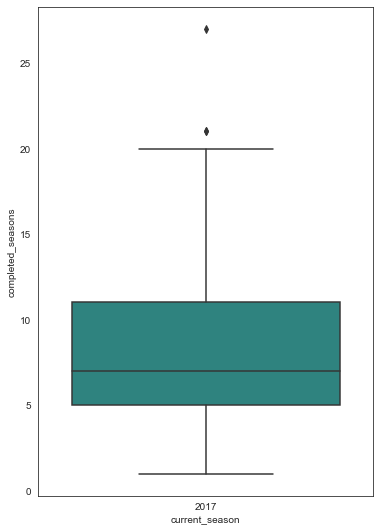

In [214]:
plt.figure(figsize = (6,9))
sns.boxplot(x = 'current_season', y = 'completed_seasons', data = players, palette = 'viridis')

There looks to be an outlier with over 25 completed seasons in professional hockey. Who is it?

In [108]:
player_max_seasons = players[players['completed_seasons'] == players['completed_seasons'].max()]
player_max_seasons[['Salary', 'Last Name', 'First Name', 'DftYr', 'DftRd', 'completed_seasons', 'age']]

,Salary,Last Name,First Name,DftYr,DftRd,completed_seasons,age
131,4000000,Jagr,Jaromir,1990.0,1.0,27.0,45


Jaromir Jagr was the oldest active player in the NHL at 45 years old.

How does his point production compare to the league average?

In [235]:
jagr = players[players['Last Name'] == 'Jagr']
rest_of_league = players[~players['Last Name'].str.contains('Jagr')]

jagr_pts = jagr['PTS'].sum()
rol_pts = rest_of_league['PTS'].mean()


jagr_pts, round(rol_pts,1)


(46, 20.7)

In [206]:
diff = 100*(jagr_pts - rol_pts)/rol_pts
round(diff,2)

122.13

Jagr had 46 points, while the league average was approximately 21 points. 
Therefore, Jagr was 122.1% more productive than the average NHL player. Not bad for a 45 year old!

Visualizing the linear relationship between age and completed seasons.\
As expected, the older the player, the more years they have spent in the league.

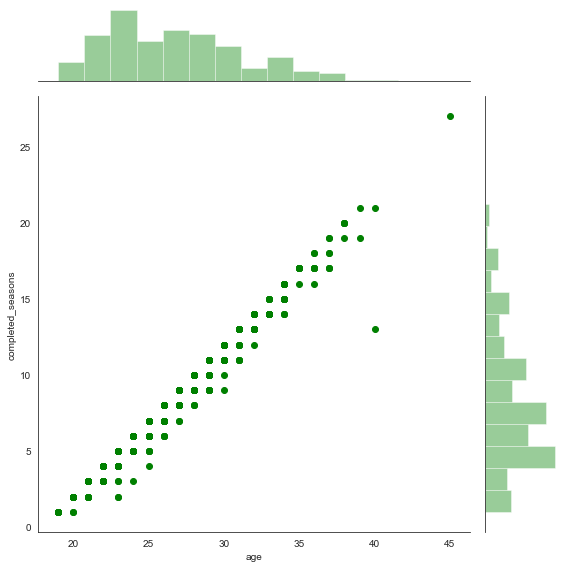

In [110]:
sns.jointplot(x = 'age', y = 'completed_seasons', data = players, color = 'green', height = 8)

But, are more experienced players putting up higher point totals?

*Assume 'over' is greater than NHL median seasons completed (7), 'median' is equal to 7, otherwise 'under'.*

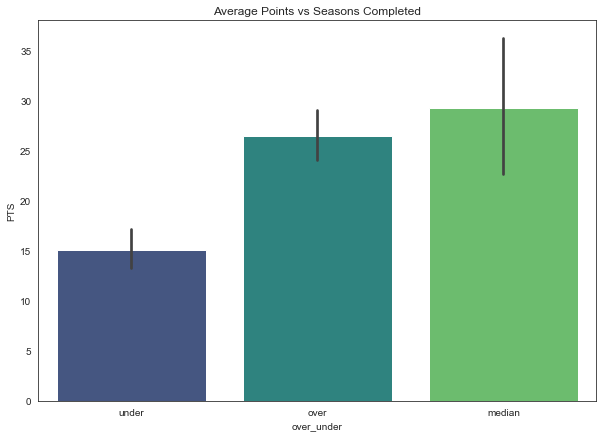

In [243]:
cs_overunder = players

def overunder(df):
    if df['completed_seasons'] > 7:
        return 'over'
    elif df['completed_seasons'] == 7:
        return 'median'
    else:
        return 'under'


cs_overunder['over_under'] = cs_overunder.apply(overunder, axis = 1)


plt.figure(figsize = (10,7))
plt.title('Average Points vs Seasons Completed')
sns.barplot(x = 'over_under', y = 'PTS', data = cs_overunder, palette = 'viridis')

Based on a median of 7 completed seasons and median age of 26, the plot above highlights the following:
 - Players average the least amount of points throughout their careers under the age of 25.
 - They enter their prime on average at around 26-27 years of age, where they are most productive offensively.
 - After surpassing 27 years of age, on average their offensive production begins to slow down.

### Examining players by their Salary, Nationality and Primary Position

Who are the Top 50 highest paid players in the NHL?

In [247]:
top_salaries = players.sort_values('Salary', ascending = False).head(50)
top_salaries[['Salary', 'Cntry', 'First Name', 'Last Name', 'Position', 'Team', 'GP', 'G', 'A', 'PTS']]

,Salary,Cntry,First Name,Last Name,Position,Team,GP,G,A,PTS
103,13800000,USA,Patrick,Kane,RW/C,CHI,82,34,55,89
496,13800000,CAN,Jonathan,Toews,C,CHI,72,21,37,58
542,12000000,CAN,Shea,Weber,D,MTL,78,17,25,42
208,11000000,CAN,P.K.,Subban,D,NSH,66,10,30,40
145,10900000,CAN,Sidney,Crosby,C,PIT,75,44,45,89
226,10000000,CZE,Jakub,Voracek,RW,PHI,82,20,41,61
260,10000000,RUS,Alex,Ovechkin,LW/RW,WSH,82,33,36,69
594,9500000,RUS,Evgeni,Malkin,C/RW,PIT,62,33,39,72
608,9000000,USA,Ryan,Suter,D,MIN,82,9,31,40
191,9000000,USA,Zach,Parise,LW,MIN,69,19,23,42


What does the breakdown look like in terms of Nationality for the top 50 highest paid players?

(0, 30)

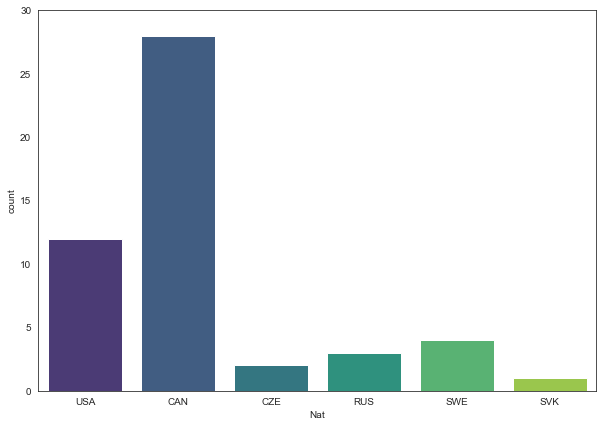

In [113]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'Nat', data = top_salaries, palette = 'viridis')
plt.ylim(0,30)

How does this compare to the breakdown league wide?

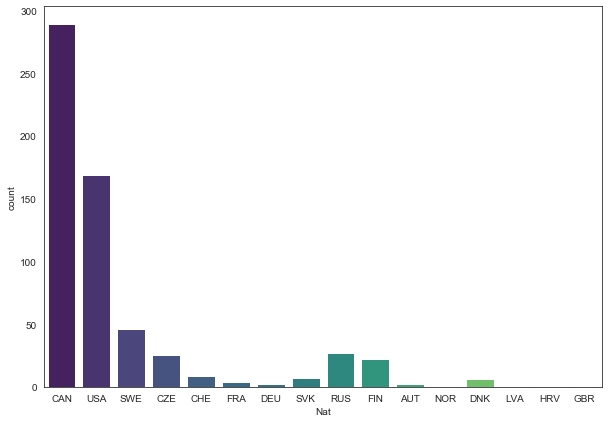

In [115]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'Nat', data = players, palette = 'viridis')

In [211]:
#Creating a column to return primary postion only
#Applying to both data sets

top_salaries['primary_position'] = top_salaries['Position'].apply(lambda x: x if len(x) == 1 else x.split('/')[0])
players['primary_position'] = players['Position'].apply(lambda x: x if len(x) == 1 else x.split('/')[0])

Let's visualize the relationship between Salary and Primary Position for the Top 50 highest paid players.

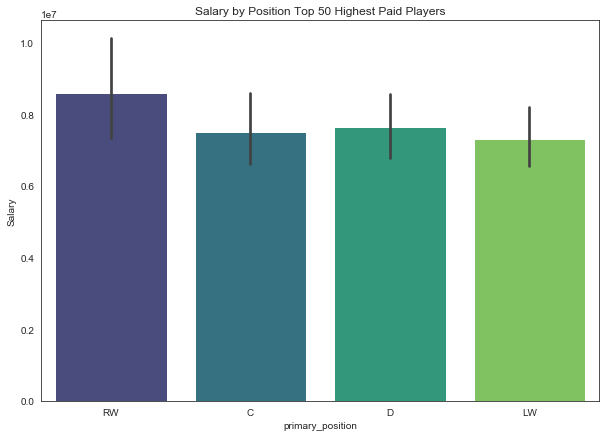

In [196]:
plt.figure(figsize = (10,7))
plt.title('Salary by Position Top 50 Highest Paid Players')
sns.barplot(x = 'primary_position', y = 'Salary', data = top_salaries, palette = 'viridis')

It appears that Right Wing (RW) is the highest paid position on average.

Does this mean that Right Wingers are the most productive offensive players among the Top 50?

In [78]:
#Creating a new column to calculate points per game (ppg)

top_salaries['ppg'] = top_salaries['PTS'] / top_salaries['GP']
players['ppg'] = players['PTS'] / players['GP']
top_salaries['ppg'].fillna(0, inplace = True)
players['ppg'].fillna(0, inplace = True)


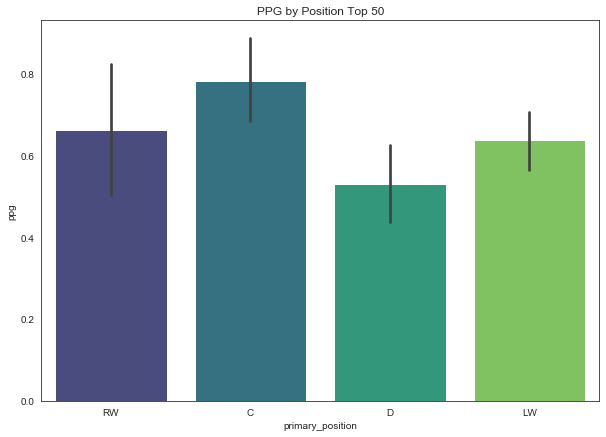

In [197]:
plt.figure(figsize = (10,7))
plt.title('PPG by Position Top 50')
sns.barplot(x = 'primary_position', y = 'ppg', data = top_salaries, palette = 'viridis')


Interesting. Based on the data, it looks like Centres have the highest average PPG among the Top 50, despite being paid less on average than Right Wingers and Defenseman.

However, when looking at PPG productivity league wide, Right Wingers reign supreme.

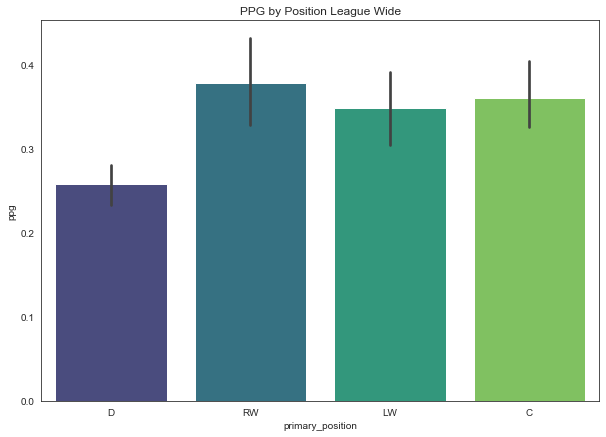

In [185]:
plt.figure(figsize = (10,7))
plt.title('PPG by Position League Wide')
sns.barplot(x = 'primary_position', y = 'ppg', data = players, palette = 'viridis')

### A closer look at the Centre position

I'd like to take a closer look back at Centreman position. This is critical role, as they are responsible for controlling the centre of the ice. A good centreman can often dictate how an entire game unfolds, creating chances offensively for both themselves and their teammates.

Who are the most productive Centres league wide in the NHL?

In [119]:
centres = players.loc[(players['primary_position'] == 'C')].sort_values(['ppg'], ascending =[False])
centres[['Salary','Last Name', 'First Name', 'age', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'ppg']].head()

,Salary,Last Name,First Name,age,primary_position,Team,GP,G,A,PTS,ppg
145,10900000,Crosby,Sidney,30,C,PIT,75,44,45,89,1.186667
594,9500000,Malkin,Evgeni,31,C,PIT,62,33,39,72,1.161290
516,7000000,Backstrom,Nicklas,30,C,WSH,82,23,63,86,1.048780
282,5000000,Scheifele,Mark,24,C,WPG,79,32,50,82,1.037975
525,925000,Draisaitl,Leon,22,C,EDM,82,29,48,77,0.939024


It is not surprsing to see both Sidney Crosby and Evgeni Malkin top the list of Centreman PPG.
The Pittsburgh Penguins created a dynasty with Crosby and Malkin as their franchise players, and as a testament to their ability, went on to win the Stanley Cup in this season.

Do the most productive Centres have the highest salaries? (Assuming 5+ GP)\
Also, I'd like to see this split by their handedness.

In [261]:
#Creating a variable to filter centres with 5 or more games played during the regular season

centres_min_gp = centres.loc[(players['GP'] >= 5)]

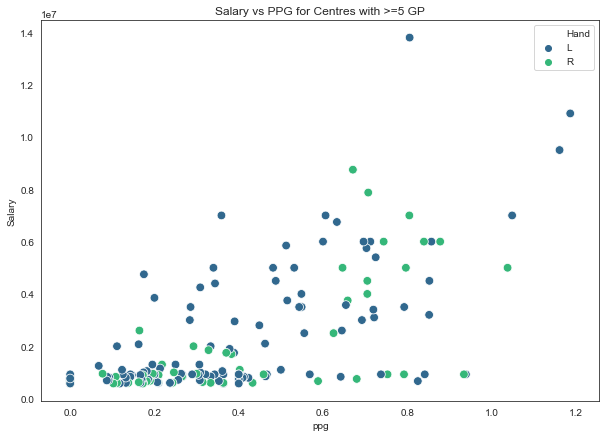

In [262]:
sns.set_style('white')
plt.figure(figsize = (10,7))
plt.title('Salary vs PPG for Centres with >=5 GP')
sns.scatterplot(x = 'ppg', y = 'Salary', data = centres_min_gp, hue = 'Hand', palette = 'viridis', s = 75)

### Hitting the post -  determining who the most unlucky NHL players are

Who was the most unlucky player in the NHL in terms of goalposts hit?

In [149]:
posts = players[players['Post'] == players['Post'].max()]
posts[['Last Name', 'First Name', 'Post']]

,Last Name,First Name,Post
260,Ovechkin,Alex,12


Alex Ovechkin is a premier goal scorer in the NHL, and is notorious for taking a high number of shots. 

Did he also rank number one in shots taken during the regular season?

In [156]:
#Creating a new column for total shots, adding up each kind of shot a player can take
players['total_shots'] = players['S.Bkhd'] + players['S.Slap'] + players['S.Snap'] +\
players['S.Tip'] + players['S.Wrap'] + players['S.Wrst'] 

In [165]:
#Checking for the player with the most shots in the regular season
most_shots = players[players['total_shots'] == players['total_shots'].max()]
most_shots[['Last Name', 'First Name', 'total_shots']]

,Last Name,First Name,total_shots
260,Ovechkin,Alex,312


With both the most shots taken, and most posts hit, does Ovechkin rank as the player with the highest post/total shot ratio in the NHL?

In [166]:
#Defining a function to calculate post to shots value
def post_to_shots(df):
    """
    Takes in a dataframe as input
    Checks if total shots are above 20, and posts greater than 0
    Returns value of posts hit divided by total shots taken
    """
    if df['total_shots'] > 20 and df['Post'] > 0:
        return df['Post'] / df['total_shots']
    else:
        return 0
    
players['post_to_shots'] = players.apply(post_to_shots, axis = 1) #adding in post to shots column

Despite hitting 5 posts to Ovechkin's 12, J.T Compher was the most unlucky shooter in the 2016/17 regular season, with 17% of his shots hitting the post. *(Ovechkin was roughly 4%)*

In [167]:
unlucky_shooter = players[players['post_to_shots'] == players['post_to_shots'].max()]
unlucky_shooter[['Last Name', 'First Name', 'Post', 'total_shots', 'post_to_shots']]

,Last Name,First Name,Post,total_shots,post_to_shots
138,Compher,J.T.,5,29,0.172414


What is the league average for both post to shots percentage, and total shots?

In [180]:
post_to_shots_avg = players['post_to_shots'].mean()
shots_avg = players['total_shots'].mean()

round(post_to_shots_avg, 3), round(shots_avg,2)

(0.011, 85.17)

### Evaluating On-Ice Efficiency and Value for Money

I'd now like to define and evaluate some further metrics, this time surrounding point production efficiency and value for money.

Which player was the most efficient relative to their TOI (time on ice) & PPG (points per game)? *Minimum of 41 GP (half season).*

In [250]:
def toi_efficiency(df):
    """
        Takes dataframe as input
        Checks if points > 0 & GP > 41
        Returns efficiency value
    """
    if df['PTS'] > 0 and df['GP'] >= 41:
        return df['PTS'] / df['TOIX'] #TOIX refers to TOI converted from seconds to minutes
    else:
        return 0

players['efficiency'] = players.apply(toi_efficiency, axis = 1)

most_efficient = players[players['efficiency'] == players['efficiency'].max()]
most_efficient[['Salary','Last Name', 'First Name', 'age', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'TOIX', 'efficiency']]




,Salary,Last Name,First Name,age,primary_position,Team,GP,G,A,PTS,TOIX,efficiency
594,9500000,Malkin,Evgeni,31,C,PIT,62,33,39,72,1143.9,0.062943


Which player had the greatest value in terms of point production to salary (value for money)?

In [251]:
def value(df):
    """
    Takes in a dataframe as input
    Checks if points are above 0 and games played are bove 41 (half season)
    Returns value of points divided by salary
    """
    if df['PTS'] > 0 and df['GP'] >= 41:
        return df['PTS'] / df['Salary'] * 1000


players['value_for_money'] = players.apply(value, axis = 1)

best_value = players[players['value_for_money'] == players['value_for_money'].max()]
best_value[['Salary','Last Name', 'First Name', 'age', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'value_for_money']]



,Salary,Last Name,First Name,age,primary_position,Team,GP,G,A,PTS,value_for_money
559,640000,Arvidsson,Viktor,24,LW,NSH,80,31,30,61,0.095313


Who was the worst value in terms of point production to salary?

In [252]:
worst_value = players[players['value_for_money'] == players['value_for_money'].min()]
worst_value[['Salary','Last Name', 'First Name', 'age', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'value_for_money']]

,Salary,Last Name,First Name,age,primary_position,Team,GP,G,A,PTS,value_for_money
424,4500000,Kulikov,Dmitry,27,D,BUF,47,2,3,5,0.001111


Any other notable under-performers?

In [263]:
twenty_worst = players.nsmallest(20,['value_for_money'])
twenty_worst[['Salary','Last Name', 'First Name', 'age', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'value_for_money']]

,Salary,Last Name,First Name,age,primary_position,Team,GP,G,A,PTS,value_for_money
424,4500000,Kulikov,Dmitry,27,D,BUF,47,2,3,5,0.001111
10,800000,Desjardins,Andrew,31,LW,CHI,46,0,1,1,0.001250
599,2700000,Stuart,Mark,33,D,WPG,42,2,2,4,0.001481
414,3900000,Gorges,Josh,33,D,BUF,66,1,5,6,0.001538
510,4000000,Beleskey,Matt,29,LW,BOS,49,3,5,8,0.002000
460,5250000,Bogosian,Zach,27,D,BUF,56,2,9,11,0.002095
273,5500000,Kronwall,Niklas,36,D,DET,57,2,11,13,0.002364
83,5500000,Orpik,Brooks,37,D,WSH,79,0,14,14,0.002545
358,3500000,Martin,Matt,28,LW,TOR,82,5,4,9,0.002571
429,775000,Deslauriers,Nicolas,26,LW,BUF,42,0,2,2,0.002581


Looks like of the Bottom 20, 14 of them are defenseman. 

It is likely that NHL General Managers value the defensive attributes of defenseman higher than their offensive production.

Therefore, let's apply the same criteria but filter out defensemen.

In [254]:
twenty_worst_forwards = players.nsmallest(50,['value_for_money']) #Taking 50 datapoints as this will likely include Dmen

twenty_worst_forwards_cleaned = twenty_worst_forwards[twenty_worst_forwards['primary_position'] != 'D']\
[['Salary','Last Name', 'age', 'First Name', 'primary_position', 'Team', 'GP', 'G', 'A', 'PTS', 'value_for_money']]

twenty_worst_forwards_cleaned.head(20)

,Salary,Last Name,age,First Name,primary_position,Team,GP,G,A,PTS,value_for_money
10,800000,Desjardins,31,Andrew,LW,CHI,46,0,1,1,0.001250
510,4000000,Beleskey,29,Matt,LW,BOS,49,3,5,8,0.002000
358,3500000,Martin,28,Matt,LW,TOR,82,5,4,9,0.002571
429,775000,Deslauriers,26,Nicolas,LW,BUF,42,0,2,2,0.002581
56,4750000,Soderberg,32,Carl,C,COL,80,6,8,14,0.002947
190,3850000,Eakin,26,Cody,C,DAL,60,3,9,12,0.003117
352,1250000,Fiddler,37,Vernon,C,N.J/NSH,59,2,2,4,0.003200
537,1200000,Thorburn,34,Chris,RW,WPG,64,3,1,4,0.003333
262,5000000,Helm,30,Darren,C,DET,50,8,9,17,0.003400
202,6075000,Gaborik,35,Marian,RW,L.A,56,10,11,21,0.003457


13 of Top 20 worst value for money forwards are aged 30 and up.

On average, what is the value for money that a 30+ forward produces?

In [255]:
forward_over_30 = players[(players['primary_position'] != 'D') & (players['age'] >= 30)]['value_for_money'].mean()
round(forward_over_30, 3)

0.011

What is the forward league average value for money, blended across all ages?

In [256]:
#Forward league average value

forward_league_ave = players[players['primary_position'] != 'D']['value_for_money'].mean()
round(forward_league_ave,3)

0.018

How do forwards aged 30+ compare to the blended league average?

In [257]:
performance = lambda x,y : round((x-y)/y,3)
print(performance(forward_over_30, forward_league_ave))

-0.386


What is the average value for money for forwards under 30?

In [258]:
forward_under_30 = players[(players['primary_position'] != 'D') & (players['age'] < 30)]['value_for_money'].mean()
round(forward_under_30,3)

0.022

How do forwards under 30 compare to the blended league average?

In [259]:
print(round(performance(forward_under_30, forward_league_ave),3))

0.203


Therefore, we can conclude that on average, forwards aged 30 and up underperform the league average value for money by -39%,
while forwards under the age of 30 overperform the league average value for money by 20.3%

In terms of offensive production, NHL GM's can expect better offensive value for money from players under 30 years of age, than those 30+.

### Final thoughts & Conclusions


Thank you for taking the time to read through this data exploration!

If you've made it this far, you've seen a range of topics explored, beginning with the distribution of draft years within the NHL, and the relationship between age and years played. We saw that the median age in the NHL there was 27, while the median seasons played was 7. We also noticed one freak of nature, Jaromir Jagr, who at age 45 who scored 122% more points than the average NHL player (46 vs league average of 20)

We looked at the Top 50 highest paid players in the NHL, which we determined were predominately Canadian (we also discovered that Canada produces the most players league wide). We then analyzed the relationship between Salary and Postion among the Top 50 highest paid players, and determined that although Right Wingers are paid the highest, Centres are more productive from a scoring standpoint. 

We then took a look at some of the more unlucky players in the NHL. We determined that Alex Ovechkin led the NHL in both posts hit and total shots, however it was J.T Compher who had the highest ratio of posts hit to shots at roughly 17% (1.1% league average).

Later, we looked at metrics regarding on ice efficiency, as well as contract value for money. 
We evaluated the most efficient players based on point production to time on ice, with Evgeni Malkin coming out on top.
We also created a value for money metric, which compared point production to total salary. With a salary of 640k and 61 points, Viktor Arvidsson was the best value for money in the NHL. Conversely, Dmitry Kulikov and Andrew Desjardins stood out as the league's worst value for money players.

Lastly, we analyzed the performance of forwards under and over the age of 30 to determine if age has an impact on offensive performance. Ultimately, it was shown that forwards under the age of 30 outperformed the league average value for money by 20.3%, while those 30 and up underperformed the league average by -38.5%, showing that good value can be had through forwards in their younger years.
